In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [19]:
df = pd.read_csv('50_Startups.csv')
#df.head()
#df.info()
df_drop = df.copy()
df_drop = df_drop.drop('State', axis=1)
df_drop.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [20]:
X = df.iloc[:,0].values
Y = df.iloc[:,-1].values

In [21]:
print(X)
print(Y)

[165349.2  162597.7  153441.51 144372.41 142107.34 131876.9  134615.46
 130298.13 120542.52 123334.88 101913.08 100671.96  93863.75  91992.39
 119943.24 114523.61  78013.11  94657.16  91749.16  86419.7   76253.86
  78389.47  73994.56  67532.53  77044.01  64664.71  75328.87  72107.6
  66051.52  65605.48  61994.48  61136.38  63408.86  55493.95  46426.07
  46014.02  28663.76  44069.95  20229.59  38558.51  28754.33  27892.92
  23640.93  15505.73  22177.74   1000.23   1315.46      0.      542.05
      0.  ]
[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673

In [22]:
X = X.reshape(len(X), 1)
Y = Y.reshape(len(Y), 1)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

y_pred = lr.predict(X_test)

In [33]:
print(y_pred)
print(Y_test)

[[ 96674.03507409]
 [105072.09707359]
 [ 50583.91491454]
 [ 67385.46236032]
 [ 51414.64909164]
 [187913.56069189]
 [126785.5514702 ]
 [168610.19302512]
 [134196.32190841]
 [178023.71030419]]
[[ 96778.92]
 [101004.64]
 [ 14681.4 ]
 [ 81229.06]
 [ 64926.08]
 [192261.83]
 [124266.9 ]
 [166187.94]
 [144259.4 ]
 [191050.39]]


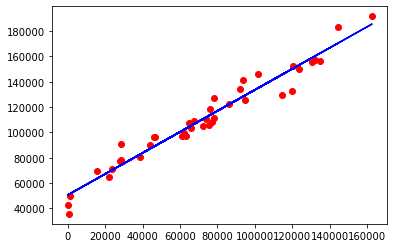

In [34]:
import matplotlib.pyplot as plt

plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color= 'blue')
#plt.scatter(X_test, y_pred, color='green')
plt.show()

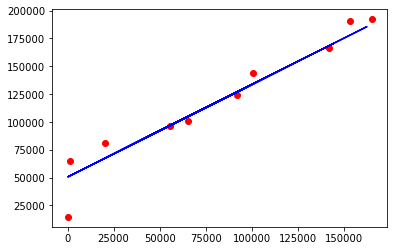

In [35]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, lr.predict(X_train), color= 'blue')
#plt.scatter(X_test, y_pred, color='green')
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_value = mean_absolute_error(Y_test, y_pred)
mse_value = mean_squared_error(Y_test, y_pred)
rmse_value = mean_squared_error(Y_test, y_pred, squared=False)
r2_value = r2_score(Y_test, y_pred)
print(f'Hasil Dari MAE: {mae_value}')
print(f'Hasil Dari MSE: {mse_value}')
print(f'Hasil Dari RMSE: {rmse_value}')
print(f'Hasil Dari R2: {r2_value}')

Hasil Dari MAE: 9980.881705291082
Hasil Dari MSE: 198182803.1379487
Hasil Dari RMSE: 14077.741407553582
Hasil Dari R2: 0.9327825094235725


In [38]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
origin_encoded = lb_make.fit_transform(y_pred)
origin_encoded

C:\Users\mfavi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([3, 4, 0, 2, 1, 9, 5, 7, 6, 8], dtype=int64)